In [38]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv(r"C:\Users\THINKPAD\Desktop\New folder\singai_flat price analysis\Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [40]:
data.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [41]:
data.shape

(190724, 11)

In [42]:
data.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [43]:
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190724 entries, 0 to 190723
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                190724 non-null  object 
 1   town                 190724 non-null  object 
 2   flat_type            190724 non-null  object 
 3   block                190724 non-null  object 
 4   street_name          190724 non-null  object 
 5   storey_range         190724 non-null  object 
 6   floor_area_sqm       190724 non-null  float64
 7   flat_model           190724 non-null  object 
 8   lease_commence_date  190724 non-null  int64  
 9   remaining_lease      190724 non-null  object 
 10  resale_price         190724 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.0+ MB


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,190724.0,97.062119,24.039220,31.0,82.0,93.0,112.0,366.7
lease_commence_date,190724.0,1996.126104,14.107795,1966.0,1985.0,1996.0,2011.0,2020.0
resale_price,190724.0,504001.016598,175716.805930,140000.0,375000.0,473000.0,600000.0,1588000.0


In [46]:
data['flat_type'].value_counts()

flat_type
4 ROOM              80522
5 ROOM              47284
3 ROOM              45193
EXECUTIVE           14073
2 ROOM               3503
MULTI-GENERATION       79
1 ROOM                 70
Name: count, dtype: int64

In [47]:
data['town'].value_counts()

town
SENGKANG           15759
PUNGGOL            14165
WOODLANDS          13511
YISHUN             13036
TAMPINES           12764
JURONG WEST        12616
BEDOK              10080
HOUGANG             9638
CHOA CHU KANG       8726
ANG MO KIO          7852
BUKIT BATOK         7546
BUKIT MERAH         7304
BUKIT PANJANG       6943
TOA PAYOH           5956
KALLANG/WHAMPOA     5805
PASIR RIS           5599
SEMBAWANG           5253
QUEENSTOWN          5251
GEYLANG             4691
CLEMENTI            4271
JURONG EAST         3908
SERANGOON           3465
BISHAN              3416
CENTRAL AREA        1526
MARINE PARADE       1165
BUKIT TIMAH          478
Name: count, dtype: int64

In [48]:
data['storey_range'].value_counts()

storey_range
04 TO 06    43838
07 TO 09    40018
10 TO 12    35548
01 TO 03    33688
13 TO 15    18300
16 TO 18     8594
19 TO 21     3703
22 TO 24     2611
25 TO 27     1584
28 TO 30     1033
31 TO 33      558
34 TO 36      505
37 TO 39      424
40 TO 42      201
43 TO 45       58
46 TO 48       45
49 TO 51       16
Name: count, dtype: int64

In [49]:
data['flat_model'].value_counts()

flat_model
Model A                   66853
Improved                  46862
New Generation            23601
Premium Apartment         21502
Simplified                 7307
Apartment                  7053
Maisonette                 5387
Standard                   5177
DBSS                       3133
Model A2                   2190
Model A-Maisonette          338
Adjoined flat               334
Type S1                     309
Type S2                     167
2-room                      136
Premium Apartment Loft      109
Terrace                     100
Multi Generation             79
3Gen                         45
Improved-Maisonette          28
Premium Maisonette           14
Name: count, dtype: int64

In [50]:
data.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [51]:
# Convert the 'month' column to a datetime format
data['month'] = pd.to_datetime(data['month'])

# Extract the year and month into separate columns
data['year'] = data['month'].dt.year
data['month_of_year'] = data['month'].dt.month
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_of_year
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,2024-09-01,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,800000.0,2024,9
190720,2024-09-01,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,900000.0,2024,9
190721,2024-09-01,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,62 years 03 months,770000.0,2024,9
190722,2024-09-01,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,66 years 10 months,1068888.0,2024,9


In [52]:
data.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                object
resale_price                  float64
year                            int32
month_of_year                   int32
dtype: object

In [53]:
data['lease_commence_year'] = pd.to_datetime(data['lease_commence_date'],format = '%Y').dt.year
# Extract the year of lease commencement
#house['lease_commence_year'] = house['lease_commence_date'].dt.year

In [54]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_of_year,lease_commence_year
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,1979
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1978
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1980
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1980
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,2024-09-01,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,800000.0,2024,9,1988
190720,2024-09-01,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,900000.0,2024,9,1988
190721,2024-09-01,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,62 years 03 months,770000.0,2024,9,1987
190722,2024-09-01,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,66 years 10 months,1068888.0,2024,9,1992


In [55]:
data.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                object
resale_price                  float64
year                            int32
month_of_year                   int32
lease_commence_year             int32
dtype: object

In [56]:
data['remaining_lease']

0         61 years 04 months
1         60 years 07 months
2         62 years 05 months
3          62 years 01 month
4         62 years 05 months
                 ...        
190719    62 years 10 months
190720    62 years 10 months
190721    62 years 03 months
190722    66 years 10 months
190723    62 years 03 months
Name: remaining_lease, Length: 190724, dtype: object

In [58]:
# Extract the remaining_lease feature

Data = data['remaining_lease']
house_new = pd.DataFrame(Data)

# Extract years and months using regular expressions
lease_info = data['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_info.columns = ['years', 'months']

# Convert to numeric values
data['remaining_lease_years'] = pd.to_numeric(lease_info['years'])
data['remaining_lease_months'] = pd.to_numeric(lease_info['months'])

In [59]:
new_data = data.copy()

In [60]:
new_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,1,1979,61.0,4.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,1,1978,60.0,7.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,1,1980,62.0,5.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,1,1980,NaN,NaN
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,1,1980,62.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,2024-09-01,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,800000.0,2024,9,1988,62.0,10.0
190720,2024-09-01,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,62 years 10 months,900000.0,2024,9,1988,62.0,10.0
190721,2024-09-01,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,62 years 03 months,770000.0,2024,9,1987,62.0,3.0
190722,2024-09-01,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1992,66 years 10 months,1068888.0,2024,9,1992,66.0,10.0


In [61]:
new_data.isnull().sum()


month                         0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
remaining_lease               0
resale_price                  0
year                          0
month_of_year                 0
lease_commence_year           0
remaining_lease_years     31267
remaining_lease_months    31267
dtype: int64

In [73]:
# handleing the null values using mean method
new_data['remaining_lease_years'].fillna(data['remaining_lease_years'].mean(),inplace = True)
new_data['remaining_lease_months'].fillna(data['remaining_lease_months'],inplace = True)
new_data.isnull().sum()

month                     0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
remaining_lease           0
resale_price              0
year                      0
month_of_year             0
lease_commence_year       0
remaining_lease_years     0
remaining_lease_months    0
dtype: int64

In [75]:
#  dropping the existing features 

new_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

In [76]:
new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,232000.0,2017,1,1979,61.000000,4.000000
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,250000.0,2017,1,1978,60.000000,7.000000
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,262000.0,2017,1,1980,62.000000,5.000000
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,265000.0,2017,1,1980,73.972626,6.540848
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,265000.0,2017,1,1980,62.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,YISHUN,EXECUTIVE,361,YISHUN RING RD,01 TO 03,146.0,Maisonette,800000.0,2024,9,1988,62.000000,10.000000
190720,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,900000.0,2024,9,1988,62.000000,10.000000
190721,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,770000.0,2024,9,1987,62.000000,3.000000
190722,YISHUN,EXECUTIVE,641,YISHUN ST 61,07 TO 09,164.0,Apartment,1068888.0,2024,9,1992,66.000000,10.000000


## Preprocessing of Data ##

In [77]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_data['town'] = encoder.fit_transform(new_data['town'])
new_data['flat_type'] = encoder.fit_transform(new_data['flat_type'])
new_data['storey_range'] = encoder.fit_transform(new_data['storey_range'])
new_data['flat_model'] = encoder.fit_transform(new_data['flat_model'])

In [78]:
new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,1,406,ANG MO KIO AVE 10,3,44.0,5,232000.0,2017,1,1979,61.000000,4.000000
1,0,2,108,ANG MO KIO AVE 4,0,67.0,12,250000.0,2017,1,1978,60.000000,7.000000
2,0,2,602,ANG MO KIO AVE 5,0,67.0,12,262000.0,2017,1,1980,62.000000,5.000000
3,0,2,465,ANG MO KIO AVE 10,1,68.0,12,265000.0,2017,1,1980,73.972626,6.540848
4,0,2,601,ANG MO KIO AVE 5,0,67.0,12,265000.0,2017,1,1980,62.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,25,5,361,YISHUN RING RD,0,146.0,7,800000.0,2024,9,1988,62.000000,10.000000
190720,25,5,358,YISHUN RING RD,0,146.0,7,900000.0,2024,9,1988,62.000000,10.000000
190721,25,5,606,YISHUN ST 61,0,147.0,3,770000.0,2024,9,1987,62.000000,3.000000
190722,25,5,641,YISHUN ST 61,2,164.0,3,1068888.0,2024,9,1992,66.000000,10.000000


In [79]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,190724.0,13.991286,7.928102,0.0,8.0,15.000000,21.0,25.0
flat_type,190724.0,3.121946,0.919595,0.0,2.0,3.000000,4.0,6.0
storey_range,190724.0,2.253156,1.979133,0.0,1.0,2.000000,3.0,16.0
floor_area_sqm,190724.0,97.062119,24.039220,31.0,82.0,93.000000,112.0,366.7
flat_model,190724.0,8.638829,3.610940,0.0,5.0,8.000000,12.0,20.0
resale_price,190724.0,504001.016598,175716.805930,140000.0,375000.0,473000.000000,600000.0,1588000.0
year,190724.0,2020.625244,2.209847,2017.0,2019.0,2021.000000,2022.0,2024.0
month_of_year,190724.0,6.521843,3.352579,1.0,4.0,7.000000,9.0,12.0
lease_commence_year,190724.0,1996.126104,14.107795,1966.0,1985.0,1996.000000,2011.0,2020.0
remaining_lease_years,190724.0,73.972626,12.797623,41.0,64.0,73.972626,83.0,97.0


## Skewness ##

In [80]:
# checking the outliars using boxplot distribution plot

def plot(new_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = new_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data = new_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()

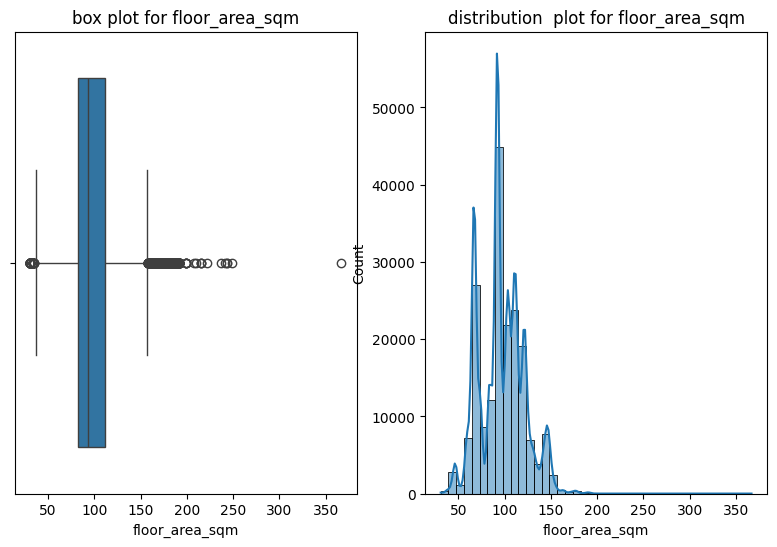

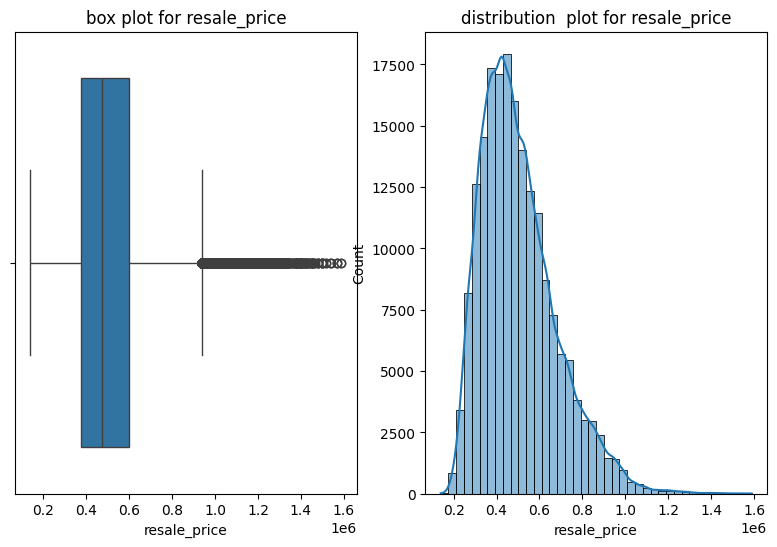

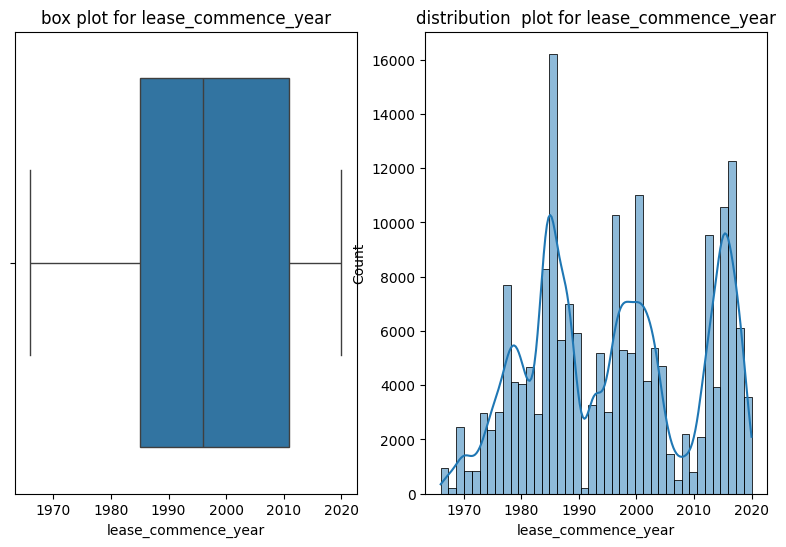

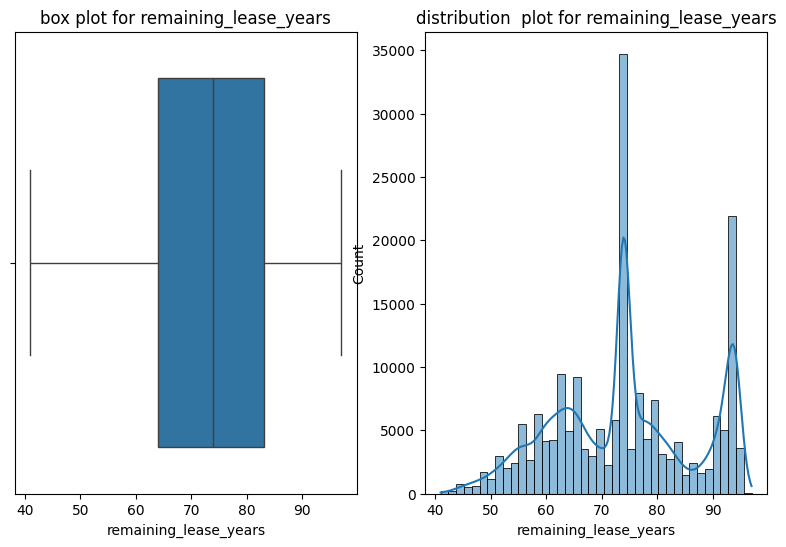

In [81]:
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(new_data ,i)

In [82]:
# 'floor_area_sqm','resale_price' this two feature are skewd in data handling log method 


new_data['floor_area_sqm'] = np.log(new_data['floor_area_sqm'])
new_data['resale_price'] = np.log(new_data['resale_price'])
new_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,1,406,ANG MO KIO AVE 10,3,3.784190,5,12.354493,2017,1,1979,61.000000,4.000000
1,0,2,108,ANG MO KIO AVE 4,0,4.204693,12,12.429216,2017,1,1978,60.000000,7.000000
2,0,2,602,ANG MO KIO AVE 5,0,4.204693,12,12.476100,2017,1,1980,62.000000,5.000000
3,0,2,465,ANG MO KIO AVE 10,1,4.219508,12,12.487485,2017,1,1980,73.972626,6.540848
4,0,2,601,ANG MO KIO AVE 5,0,4.204693,12,12.487485,2017,1,1980,62.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,25,5,361,YISHUN RING RD,0,4.983607,7,13.592367,2024,9,1988,62.000000,10.000000
190720,25,5,358,YISHUN RING RD,0,4.983607,7,13.710150,2024,9,1988,62.000000,10.000000
190721,25,5,606,YISHUN ST 61,0,4.990433,3,13.554146,2024,9,1987,62.000000,3.000000
190722,25,5,641,YISHUN ST 61,2,5.099866,3,13.882129,2024,9,1992,66.000000,10.000000


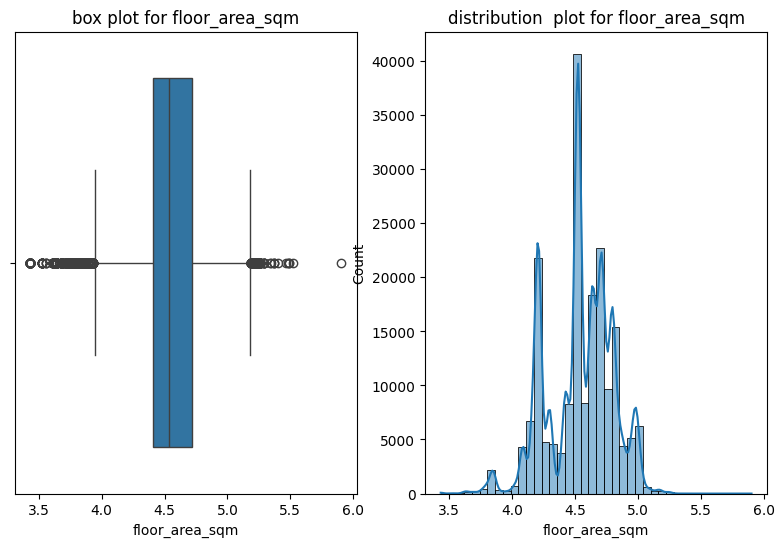

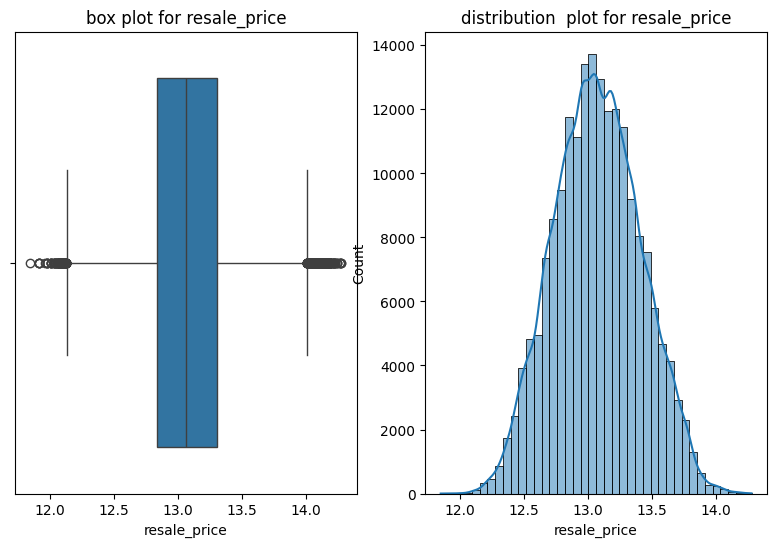

In [83]:
for i in ['floor_area_sqm','resale_price']:
    plot(new_data,i)

## Outliers and IQR ##

In [85]:
#using the IQR & Clips  method removing the outliars :
# formula IQR = Q3_Q1
def outlier(new_data ,column):
    IQR = new_data[column].quantile(0.75)-new_data[column].quantile(0.25)
    upper_value = new_data[column].quantile(0.75)+1.5*IQR
    lower_value = new_data[column].quantile(0.25)-1.5*IQR
    
    new_data[column] = new_data[column].clip(upper_value,lower_value)

outlier(new_data, 'floor_area_sqm')
outlier(new_data, 'resale_price')
new_data1 = new_data.copy()

In [86]:
new_data1

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,1,406,ANG MO KIO AVE 10,3,3.939050,5,12.354493,2017,1,1979,61.000000,4.000000
1,0,2,108,ANG MO KIO AVE 4,0,4.204693,12,12.429216,2017,1,1978,60.000000,7.000000
2,0,2,602,ANG MO KIO AVE 5,0,4.204693,12,12.476100,2017,1,1980,62.000000,5.000000
3,0,2,465,ANG MO KIO AVE 10,1,4.219508,12,12.487485,2017,1,1980,73.972626,6.540848
4,0,2,601,ANG MO KIO AVE 5,0,4.204693,12,12.487485,2017,1,1980,62.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190719,25,5,361,YISHUN RING RD,0,4.983607,7,13.592367,2024,9,1988,62.000000,10.000000
190720,25,5,358,YISHUN RING RD,0,4.983607,7,13.710150,2024,9,1988,62.000000,10.000000
190721,25,5,606,YISHUN ST 61,0,4.990433,3,13.554146,2024,9,1987,62.000000,3.000000
190722,25,5,641,YISHUN ST 61,2,5.099866,3,13.882129,2024,9,1992,66.000000,10.000000


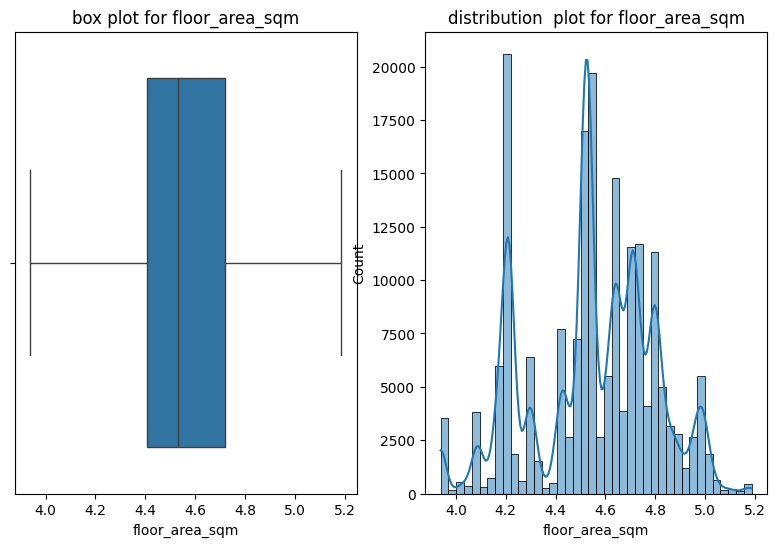

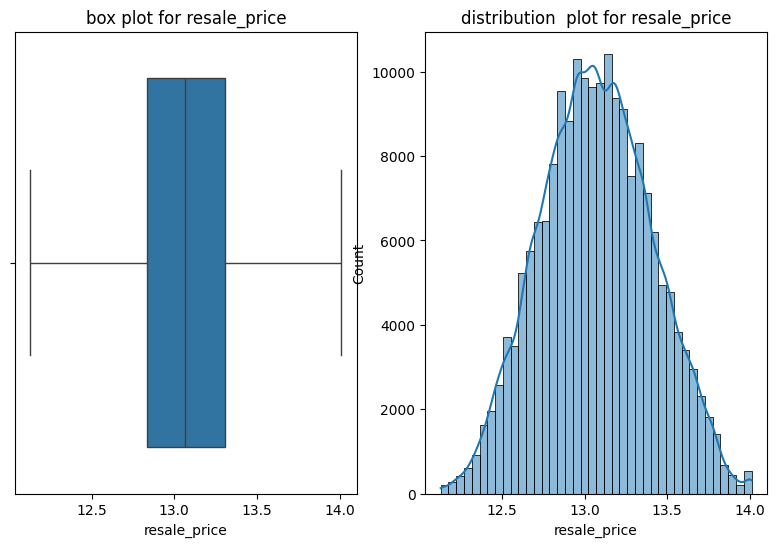

In [87]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(new_data1,i)

<Axes: xlabel='resale_price', ylabel='flat_model'>

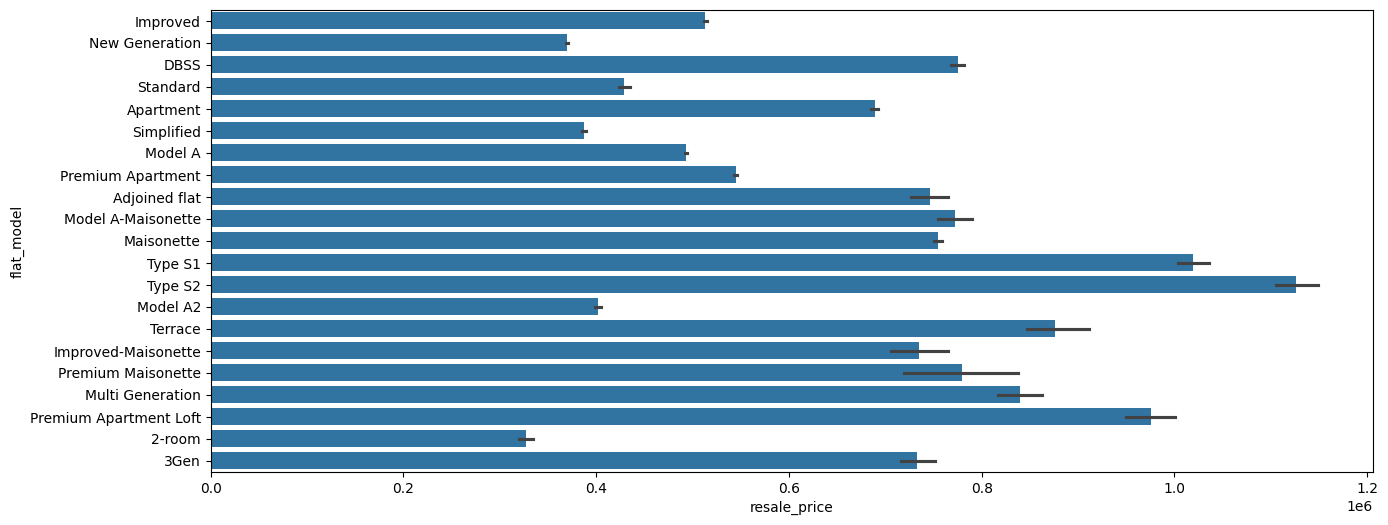

In [89]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_model', x= 'resale_price',data = data )

<Axes: xlabel='resale_price', ylabel='town'>

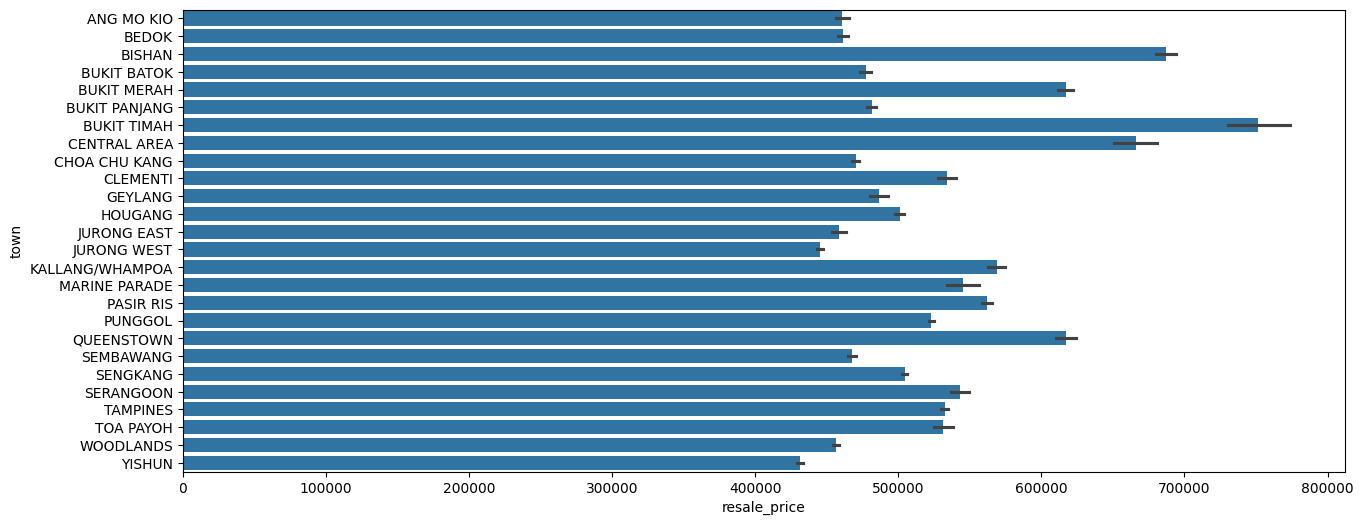

In [90]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'town', x= 'resale_price',data = data )

## EDA ##

<Axes: xlabel='resale_price', ylabel='flat_type'>

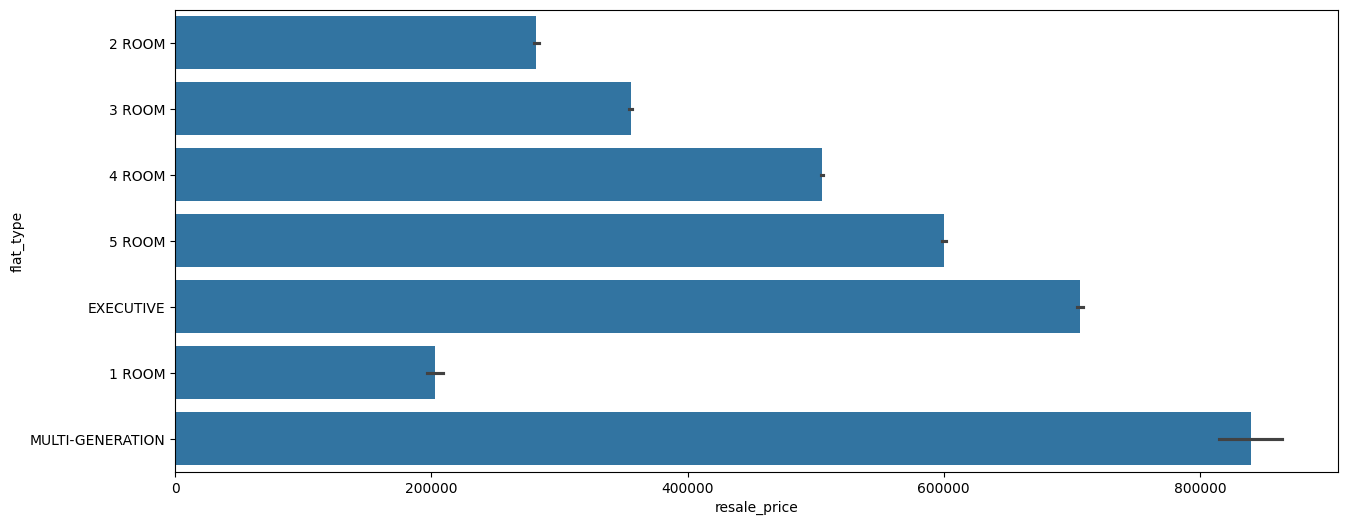

In [91]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_type', x= 'resale_price',data = data )

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

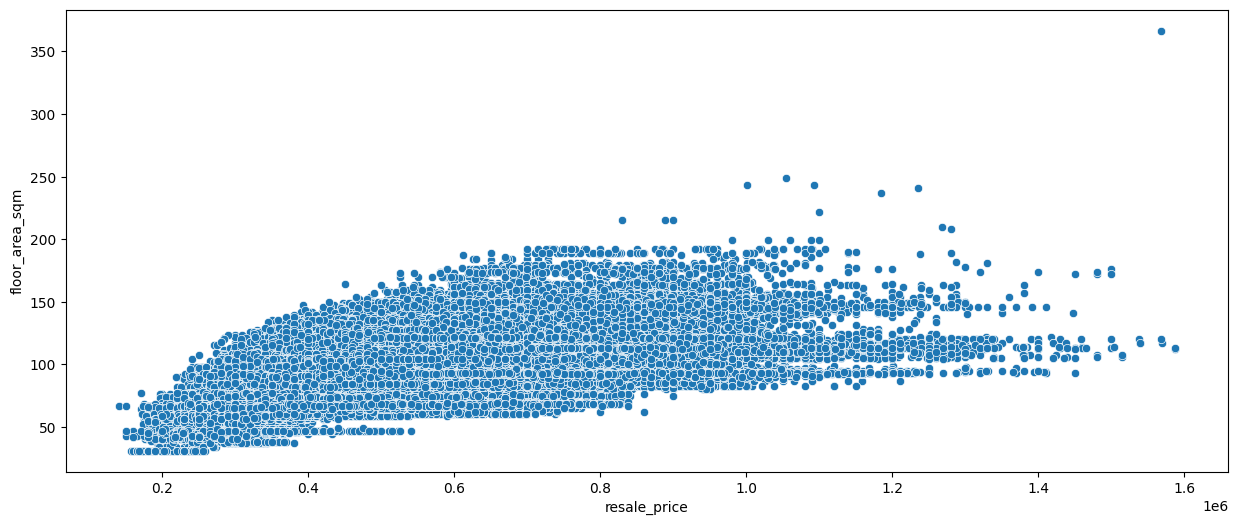

In [92]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'resale_price' ,y = 'floor_area_sqm',data = data)

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

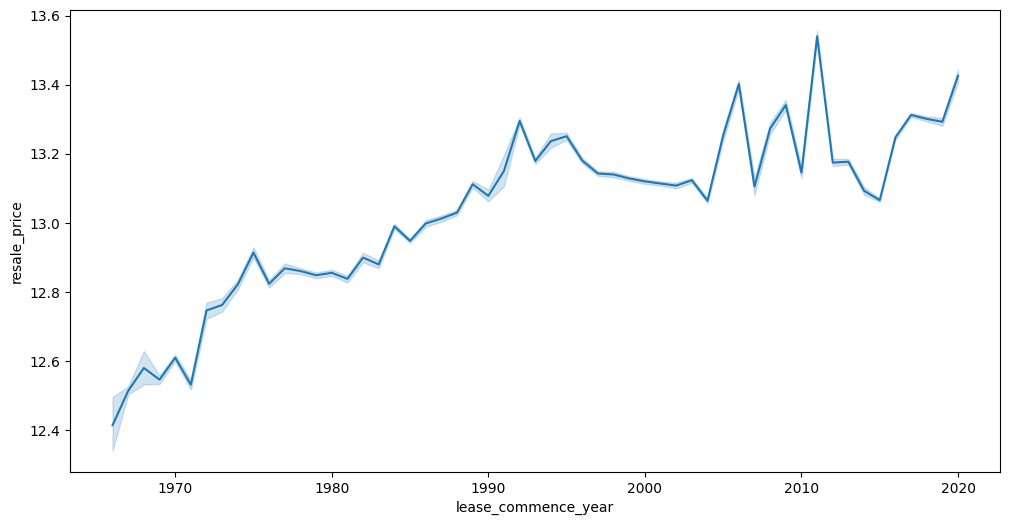

In [93]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'lease_commence_year' , y = 'resale_price', data = new_data)

<Axes: xlabel='year', ylabel='resale_price'>

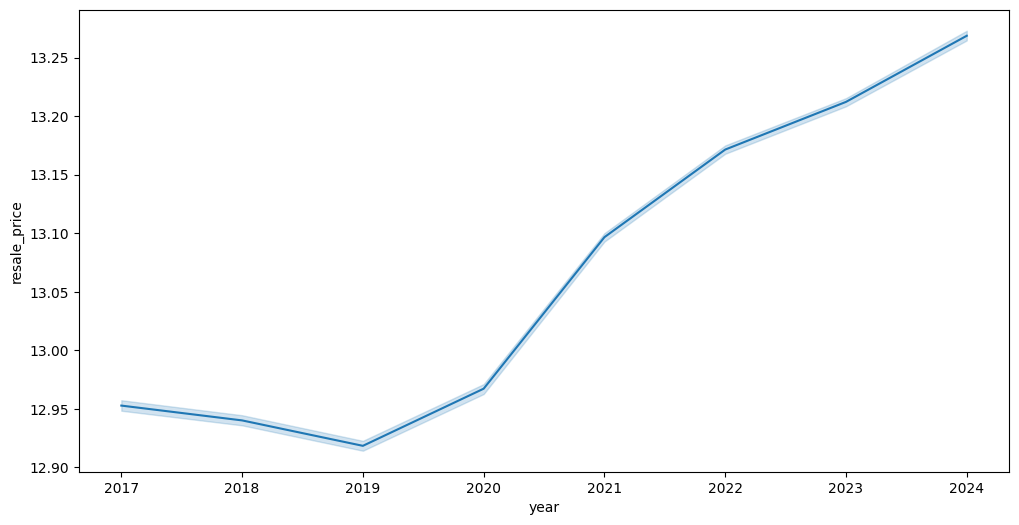

In [94]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'resale_price', data = new_data)

<Axes: xlabel='remaining_lease_years', ylabel='resale_price'>

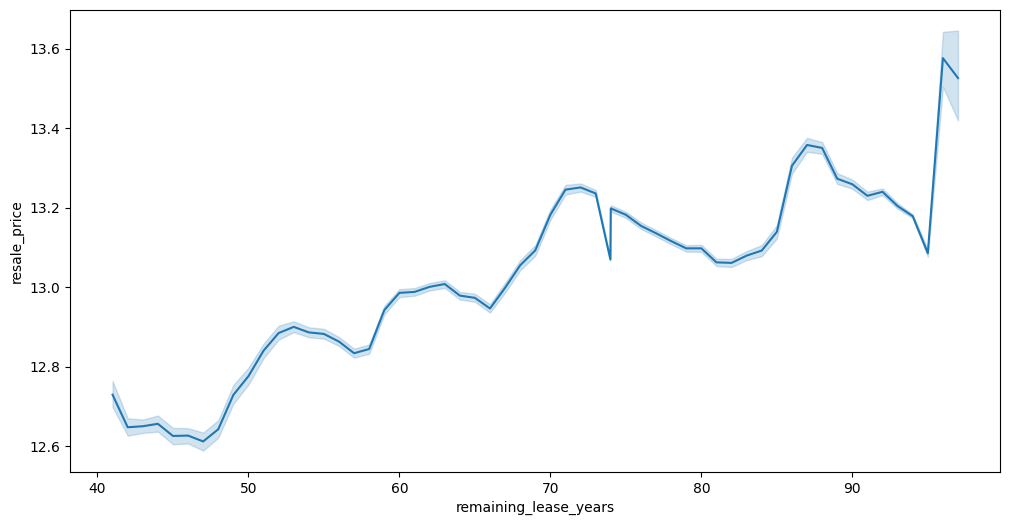

In [95]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'remaining_lease_years' , y = 'resale_price', data = new_data)

In [96]:
# dropping the irrelvent feature 
new_data1.drop(columns=['block','street_name'],inplace = True)
new_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,1,3,3.939050,5,12.354493,2017,1,1979,61.000000,4.000000
1,0,2,0,4.204693,12,12.429216,2017,1,1978,60.000000,7.000000
2,0,2,0,4.204693,12,12.476100,2017,1,1980,62.000000,5.000000
3,0,2,1,4.219508,12,12.487485,2017,1,1980,73.972626,6.540848
4,0,2,0,4.204693,12,12.487485,2017,1,1980,62.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
190719,25,5,0,4.983607,7,13.592367,2024,9,1988,62.000000,10.000000
190720,25,5,0,4.983607,7,13.710150,2024,9,1988,62.000000,10.000000
190721,25,5,0,4.990433,3,13.554146,2024,9,1987,62.000000,3.000000
190722,25,5,2,5.099866,3,13.882129,2024,9,1992,66.000000,10.000000


In [97]:
new_data1.dtypes

town                        int32
flat_type                   int32
storey_range                int32
floor_area_sqm            float64
flat_model                  int32
resale_price              float64
year                        int32
month_of_year               int32
lease_commence_year         int32
remaining_lease_years     float64
remaining_lease_months    float64
dtype: object

In [98]:
Heatmap = new_data1.corr()
Heatmap

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
town,1.000000,0.100372,-0.054493,0.096591,-0.083048,-0.014163,0.006863,0.008178,0.210552,0.192012,0.001723
flat_type,0.100372,1.000000,0.029279,0.947310,-0.323657,0.649624,-0.031970,0.005951,0.174692,0.166315,-0.003472
storey_range,-0.054493,0.029279,1.000000,0.002097,-0.040637,0.322128,0.013039,-0.001908,0.275132,0.251491,-0.000907
floor_area_sqm,0.096591,0.947310,0.002097,1.000000,-0.321020,0.651420,-0.035273,0.003256,0.154236,0.148127,-0.004741
flat_model,-0.083048,-0.323657,-0.040637,-0.321020,1.000000,-0.243010,-0.016005,-0.004657,-0.125045,-0.114752,0.000852
resale_price,-0.014163,0.649624,0.322128,0.651420,-0.243010,1.000000,0.351495,-0.005308,0.407947,0.324846,0.005605
year,0.006863,-0.031970,0.013039,-0.035273,-0.016005,0.351495,1.000000,-0.117036,0.130796,-0.020977,0.009546
month_of_year,0.008178,0.005951,-0.001908,0.003256,-0.004657,-0.005308,-0.117036,1.000000,0.003342,-0.008920,0.017608
lease_commence_year,0.210552,0.174692,0.275132,0.154236,-0.125045,0.407947,0.130796,0.003342,1.000000,0.901231,0.016436
remaining_lease_years,0.192012,0.166315,0.251491,0.148127,-0.114752,0.324846,-0.020977,-0.008920,0.901231,1.000000,-0.001943


<Axes: >

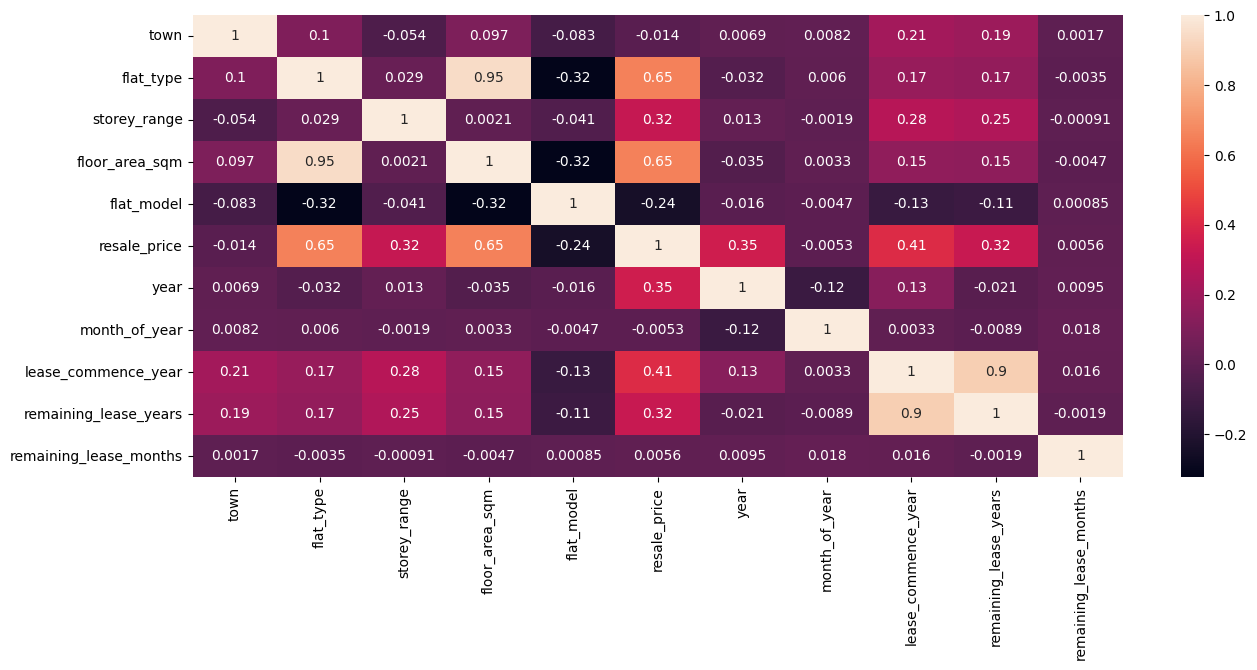

In [100]:
# Need to verify any columns are highly correlated using Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(Heatmap,annot = True)

## Model ##

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [102]:
new_data1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months'],
      dtype='object')

In [103]:
x = new_data1[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
        'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months']]
y = new_data1[['resale_price']]

In [104]:
#standardize the features of a dataset
encoder = StandardScaler()

encoder.fit_transform(x)

array([[-1.7647757 , -2.30748521,  0.37735995, ..., -1.21394935,
        -1.0136773 , -0.96247711],
       [-1.7647757 , -1.2200469 , -1.13845921, ..., -1.28483233,
        -1.09181701,  0.17392748],
       [-1.7647757 , -1.2200469 , -1.13845921, ..., -1.14306636,
        -0.93553758, -0.58367558],
       ...,
       [ 1.38857225,  2.04226803, -1.13845921, ..., -0.64688547,
        -0.93553758, -1.34127864],
       [ 1.38857225,  2.04226803, -0.1279131 , ..., -0.29247054,
        -0.62297872,  1.31033207],
       [ 1.38857225,  2.04226803, -1.13845921, ..., -0.64688547,
        -0.93553758, -1.34127864]])

In [105]:
#check the accuracy of training and testing using metrics RandomForestRegressor


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

RFR= RandomForestRegressor(n_estimators= 50 ,random_state = 0)

# fitting the model: 

RFR.fit(x_train,y_train)

y_pred_train = RFR.predict(x_train)
y_pred_test = RFR.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9930667287448701, 0.9557967681711261)

In [106]:
# GridsearchCV is a cross validation function
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

param = {'max_depth'        : [20],
              'min_samples_split': [ 5, ],
              'min_samples_leaf' : [ 2, ],
              'max_features'     : ['log2']}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param,  cv = 5)
grid_searchcv.fit(x_train, y_train)

c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [107]:
grid_searchcv.best_score_

0.92857812546447

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

r2_train,r2_test

c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9582566921807061, 0.9318668708941019)

In [109]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

RFR = RandomForestRegressor()

Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

# fitting the model: 

Hyper_model.fit(x_train,y_train)

y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.0077053312911060275
Mean Absolute Error: 0.06349277645701243
Root Mean Squared Error: 0.08778001646790702
0.9329045014587322


In [111]:
# manually passed the user input and predict the selling price

user_data = np.array([[0,1,3,3.785069,5,2017,1,1979,61.000000,4.000000]])
y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


12.374822368746953

In [112]:
user_data = np.array([[4,3,2,4.785069,4,2023,3,1989,69.000000,4.000000]])

y_prediction = Hyper_model.predict(user_data)
y_prediction[0]

c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


13.514875478854101

In [113]:
# using Inverse Log Transformation to convert the value to original re sale price of the data (exp)
np.exp(y_prediction[0])

740347.8918691373

In [118]:
with open("C:\\Users\\THINKPAD\Desktop\\New folder\\house_price_model.pkl", 'wb') as f:
    pickle.dump(Hyper_model, f)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6788\2401573934.py:1: SyntaxWarning: invalid escape sequence '\D'
  with open("C:\\Users\\THINKPAD\Desktop\\New folder\\house_price_model.pkl", 'wb') as f:


In [121]:
# load the model
with open("C:\\Users\\THINKPAD\Desktop\\New folder\\\house_price_model.pkl", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]])
prediction = model.predict(user_data)
predicted_price = prediction[0]
predicted_price
np.exp(predicted_price)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6788\1748976073.py:2: SyntaxWarning: invalid escape sequence '\D'
  with open("C:\\Users\\THINKPAD\Desktop\\New folder\\\house_price_model.pkl", 'rb') as f:
c:\Users\THINKPAD\Desktop\New folder\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


740347.8918691373